Import PinotNoir.csv datset for Exploratory Data Analysis

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# read .csv
df = pd.read_csv('PinotNoir.csv');

In [3]:
'{} {}'.format(df.index, df.columns)

"RangeIndex(start=0, stop=37, step=1) Index(['Cd', 'Mo', 'Mn', 'Ni', 'Cu', 'Al', 'Ba', 'Cr', 'Sr', 'Pb', 'B', 'Mg',\n       'Si', 'Na', 'Ca', 'P', 'K', 'Aroma'],\n      dtype='object')"

In [4]:
# for every list of means and every list of stanard deviations of the create a list of normal distributions 
# each normal distribution represents the distribution of each element
means = [round(np.mean(df[col]).item(), 2) for col in df.columns]
stds =  [round(np.std(df[col]), 2) for col in df.columns]
normal_samples = [np.random.normal(i, j, 10000) for i,j in zip(means, stds)]
metals_labels = [i for i in df.columns]

In [5]:
# reshape data to make it easier to plot
means_array = np.asarray(means).reshape(6,3)
stds_array = np.asarray(stds).reshape(6,3)
samples_array = np.asarray(normal_samples).reshape(6,3,10000)
metals_array = np.asarray(metals_labels).reshape(6,3)
df_array = df.to_numpy().reshape(6,3,37)

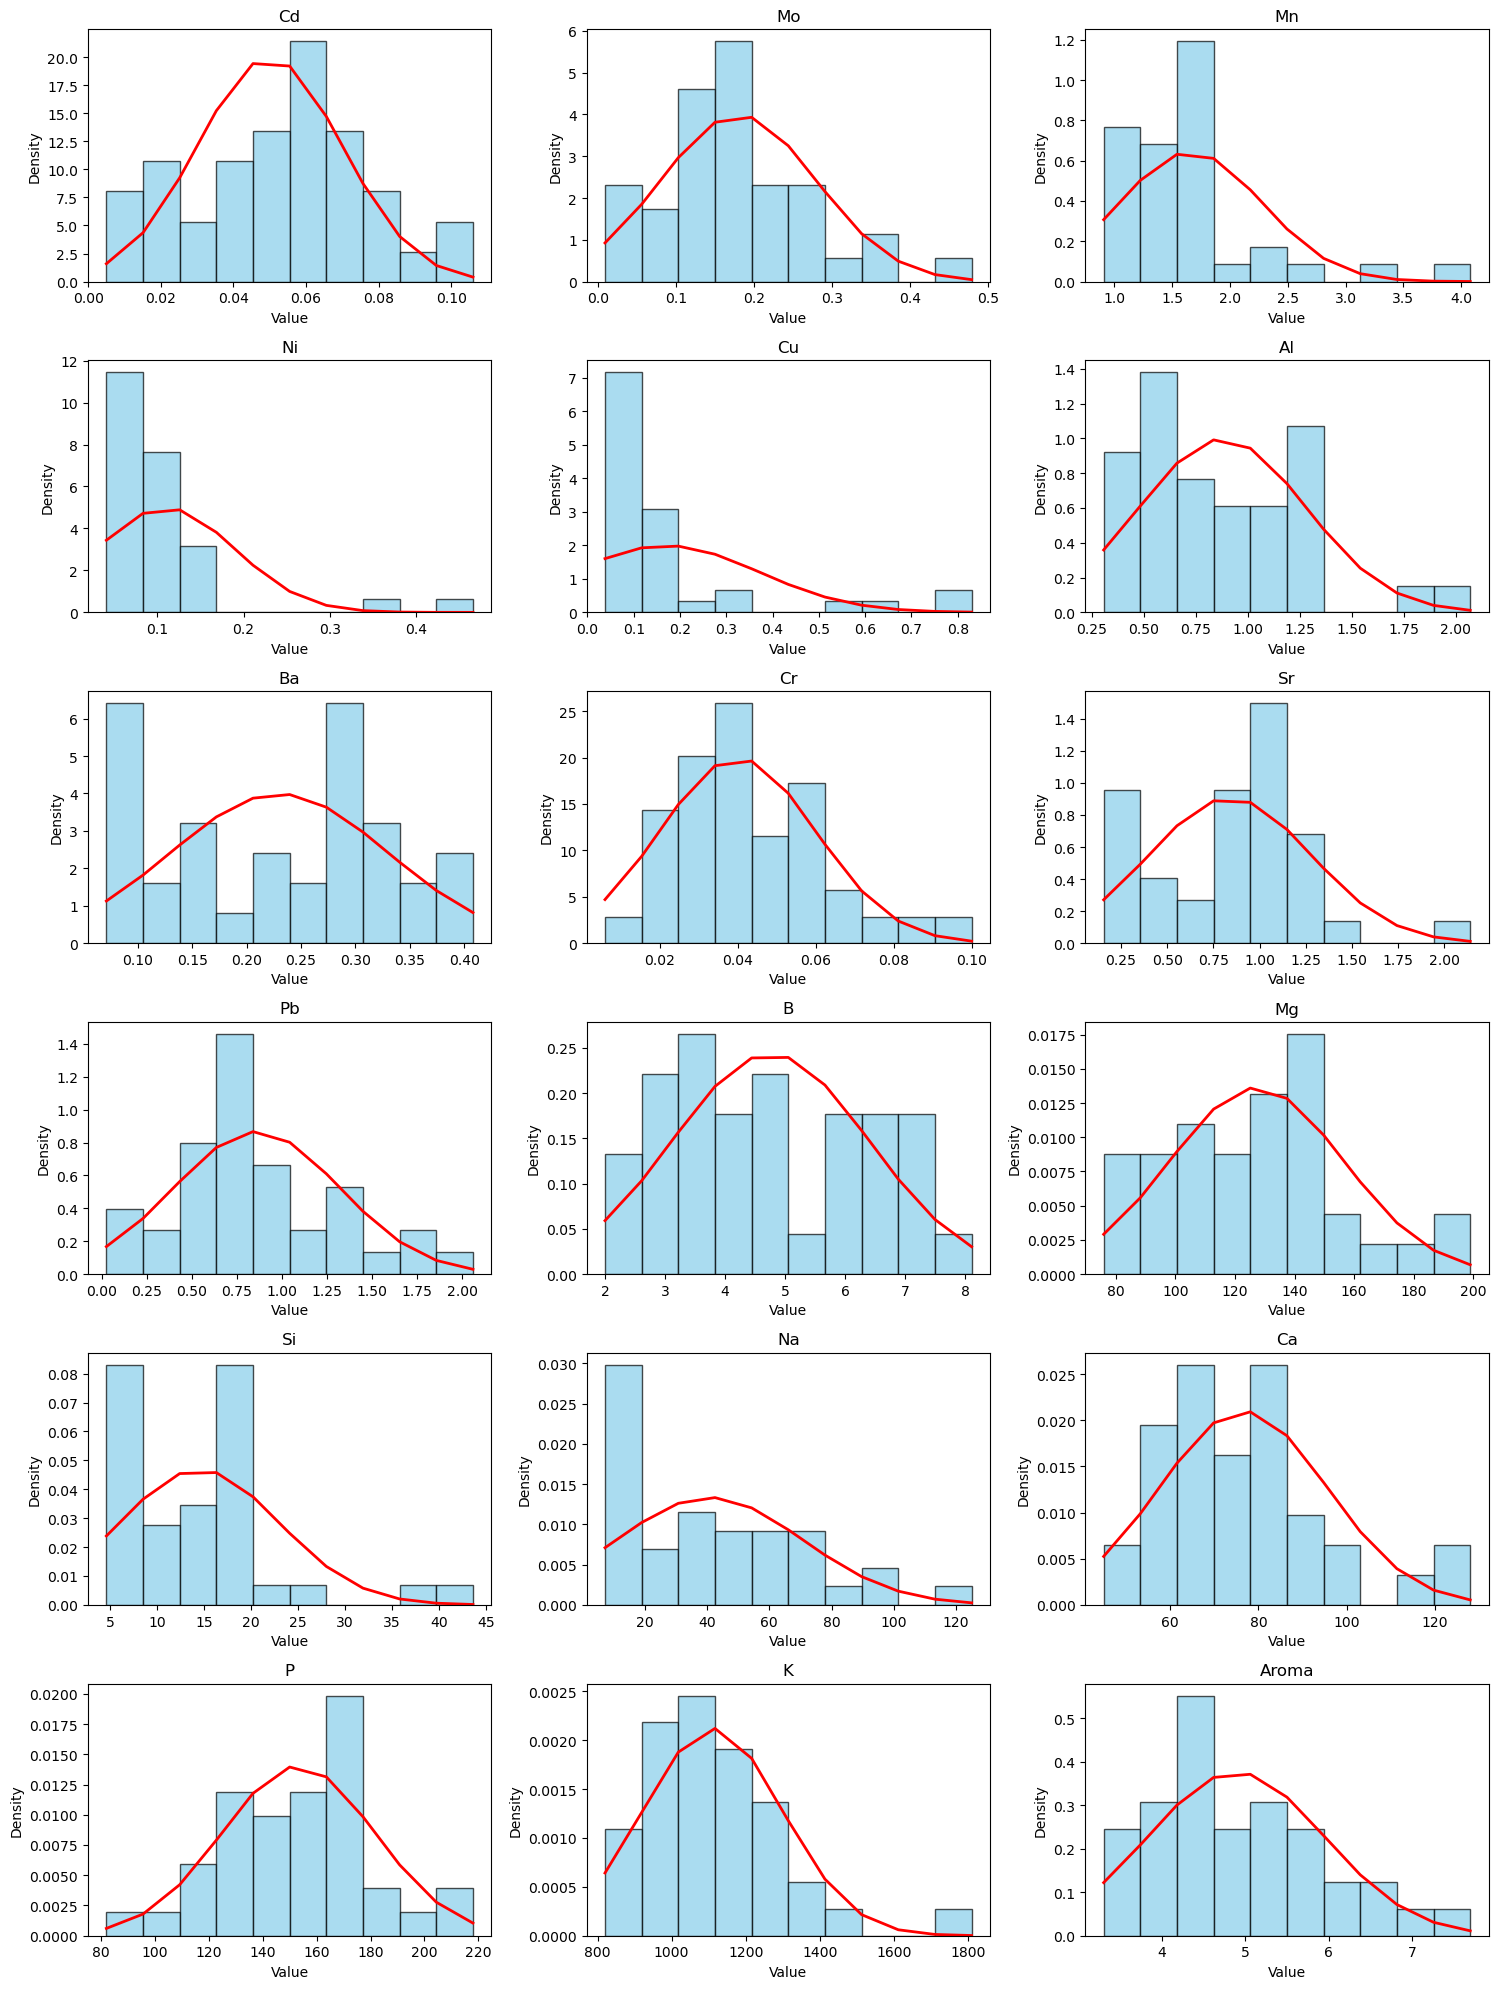

In [6]:
# Create subplots: 6 rows, 3 columns, figure size (15, 20)
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

# Flatten the axes array to loop over easily
axes = axes.flatten()

# Loop through each subplot and plot the histogram and PDF
for idx, col in enumerate(df.columns):

    # Create the histogram with density=True to normalize it
    count, bins, ignored = axes[idx].hist(df[col], bins=10 , density=True, color='skyblue', edgecolor='black', alpha=0.7)
    
    
    # Plot the normal distribution PDF over the histogram
    pdf = 1 / (stds[idx] * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((bins - means[idx]) / stds[idx]) ** 2)
    axes[idx].plot(bins, pdf, linewidth=2, color='r')
    
    # Set title and labels for each subplot
    axes[idx].set_title(metals_labels[idx])
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Density')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

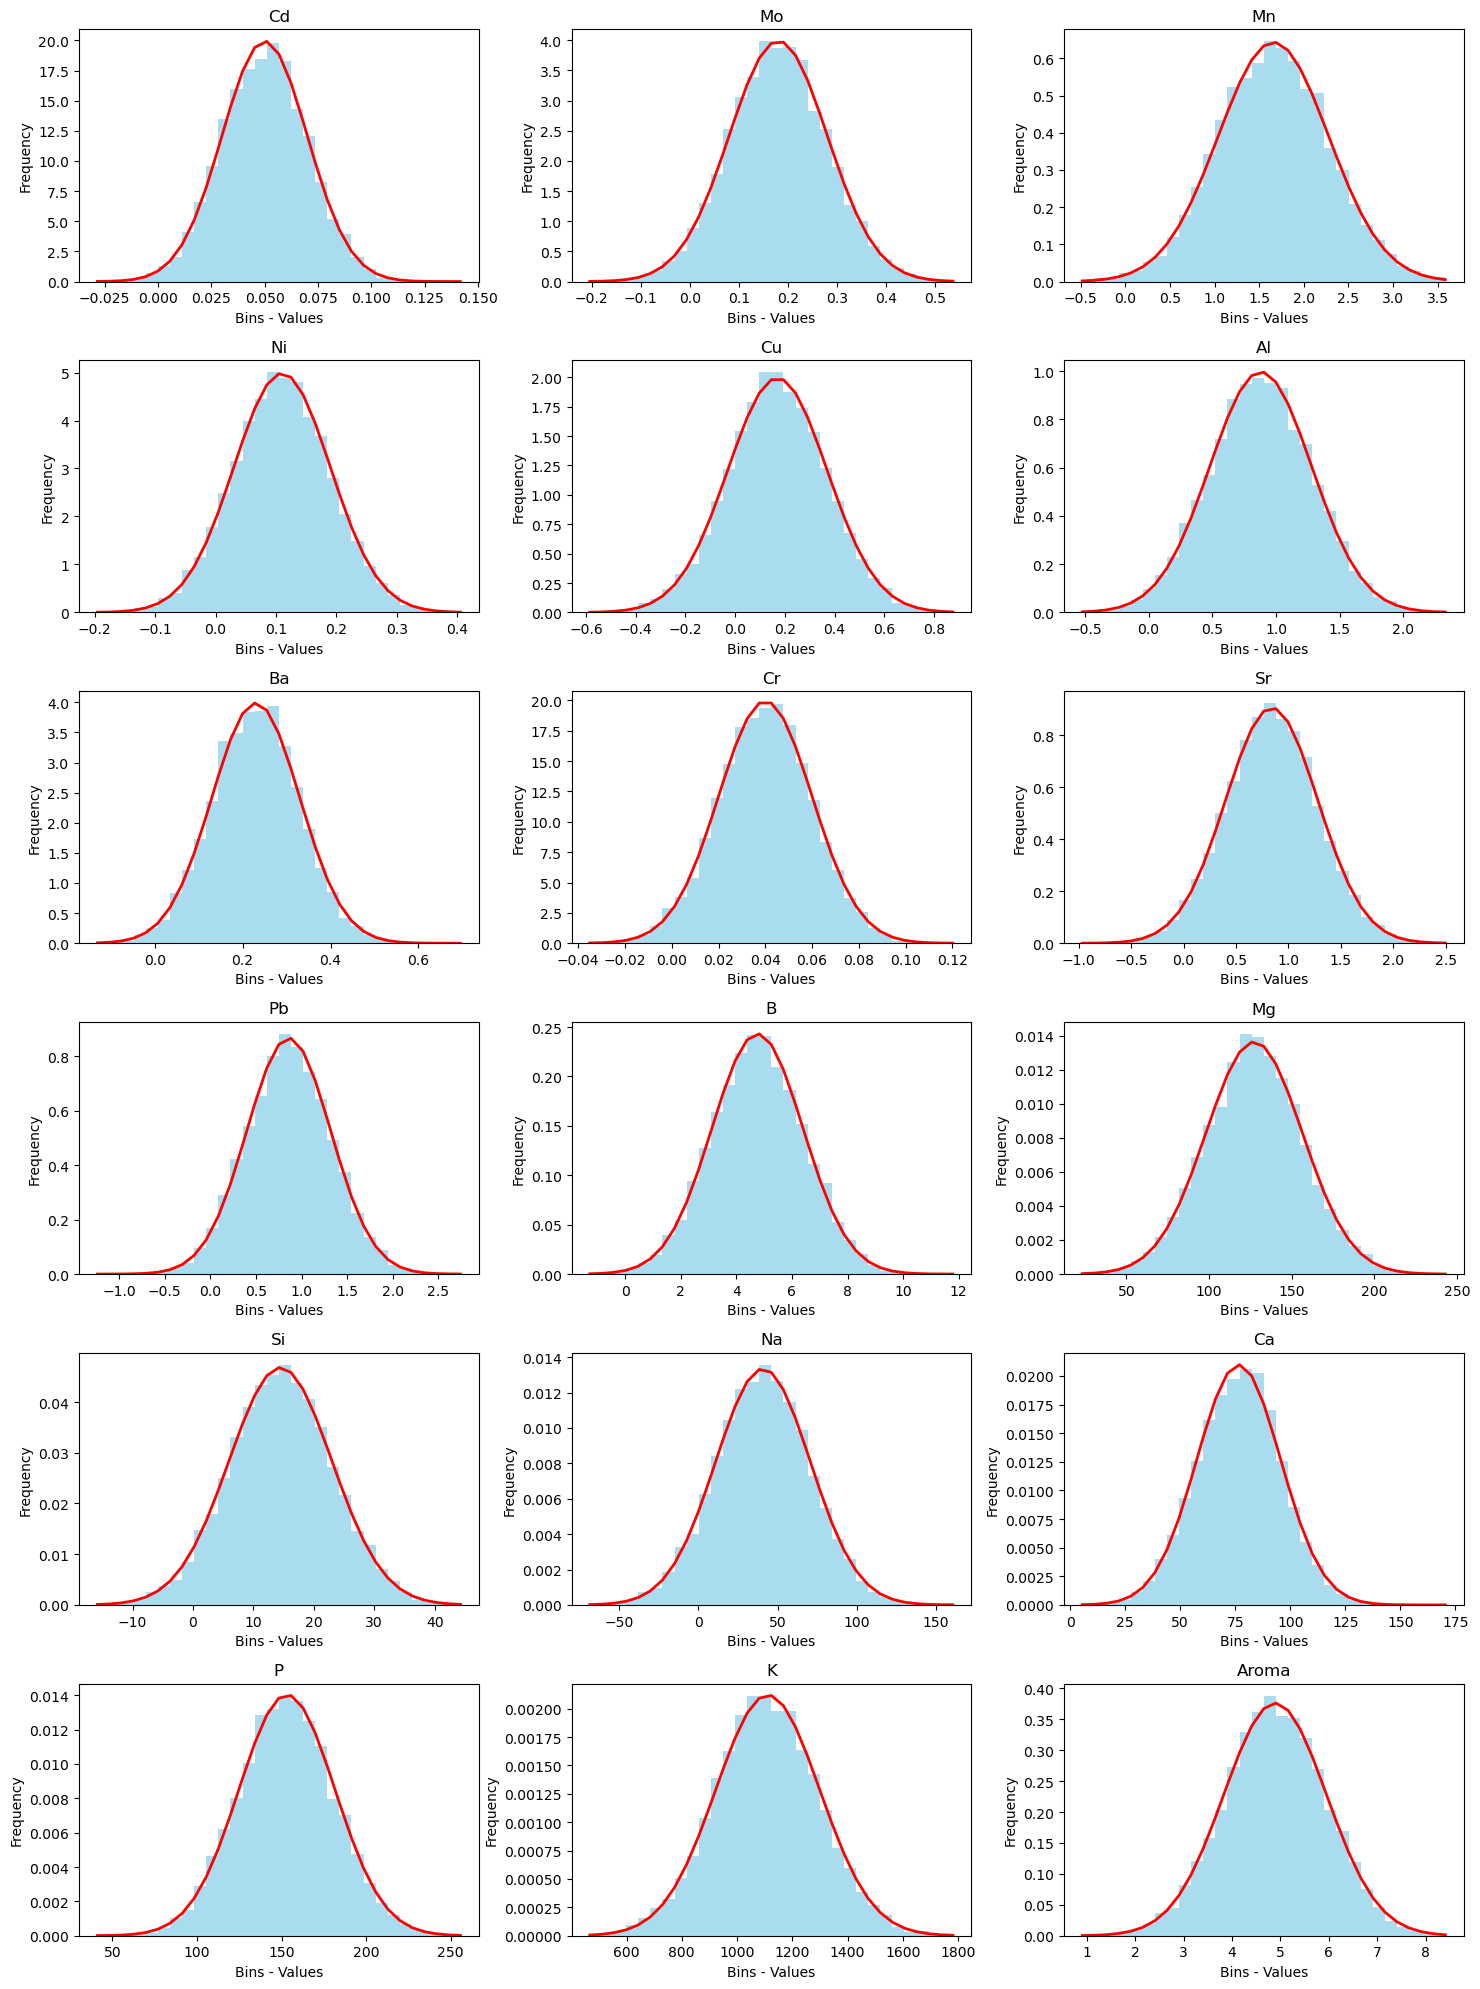

In [8]:
# Create subplots: 6 rows, 3 columns, figure size (15, 20)
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

# Loop through each subplot
for i in range(6):
    for j in range(3):
        pdf = norm.pdf(bins, loc=means_array[i, j], scale=stds_array[i, j])
        count, bins, ignored = axes[i, j].hist(samples_array[i,j], 30, density=True, color='skyblue',alpha=0.7)
        pdf = norm.pdf(bins, loc=means_array[i, j], scale=stds_array[i, j])
        axes[i, j].plot(bins, pdf, linewidth=2, color='r');
        
        # Set title and labels
        axes[i, j].set_title(metals_array[i,j])
        axes[i, j].set_xlabel('Bins - Values')
        axes[i, j].set_ylabel('Frequency')
        

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

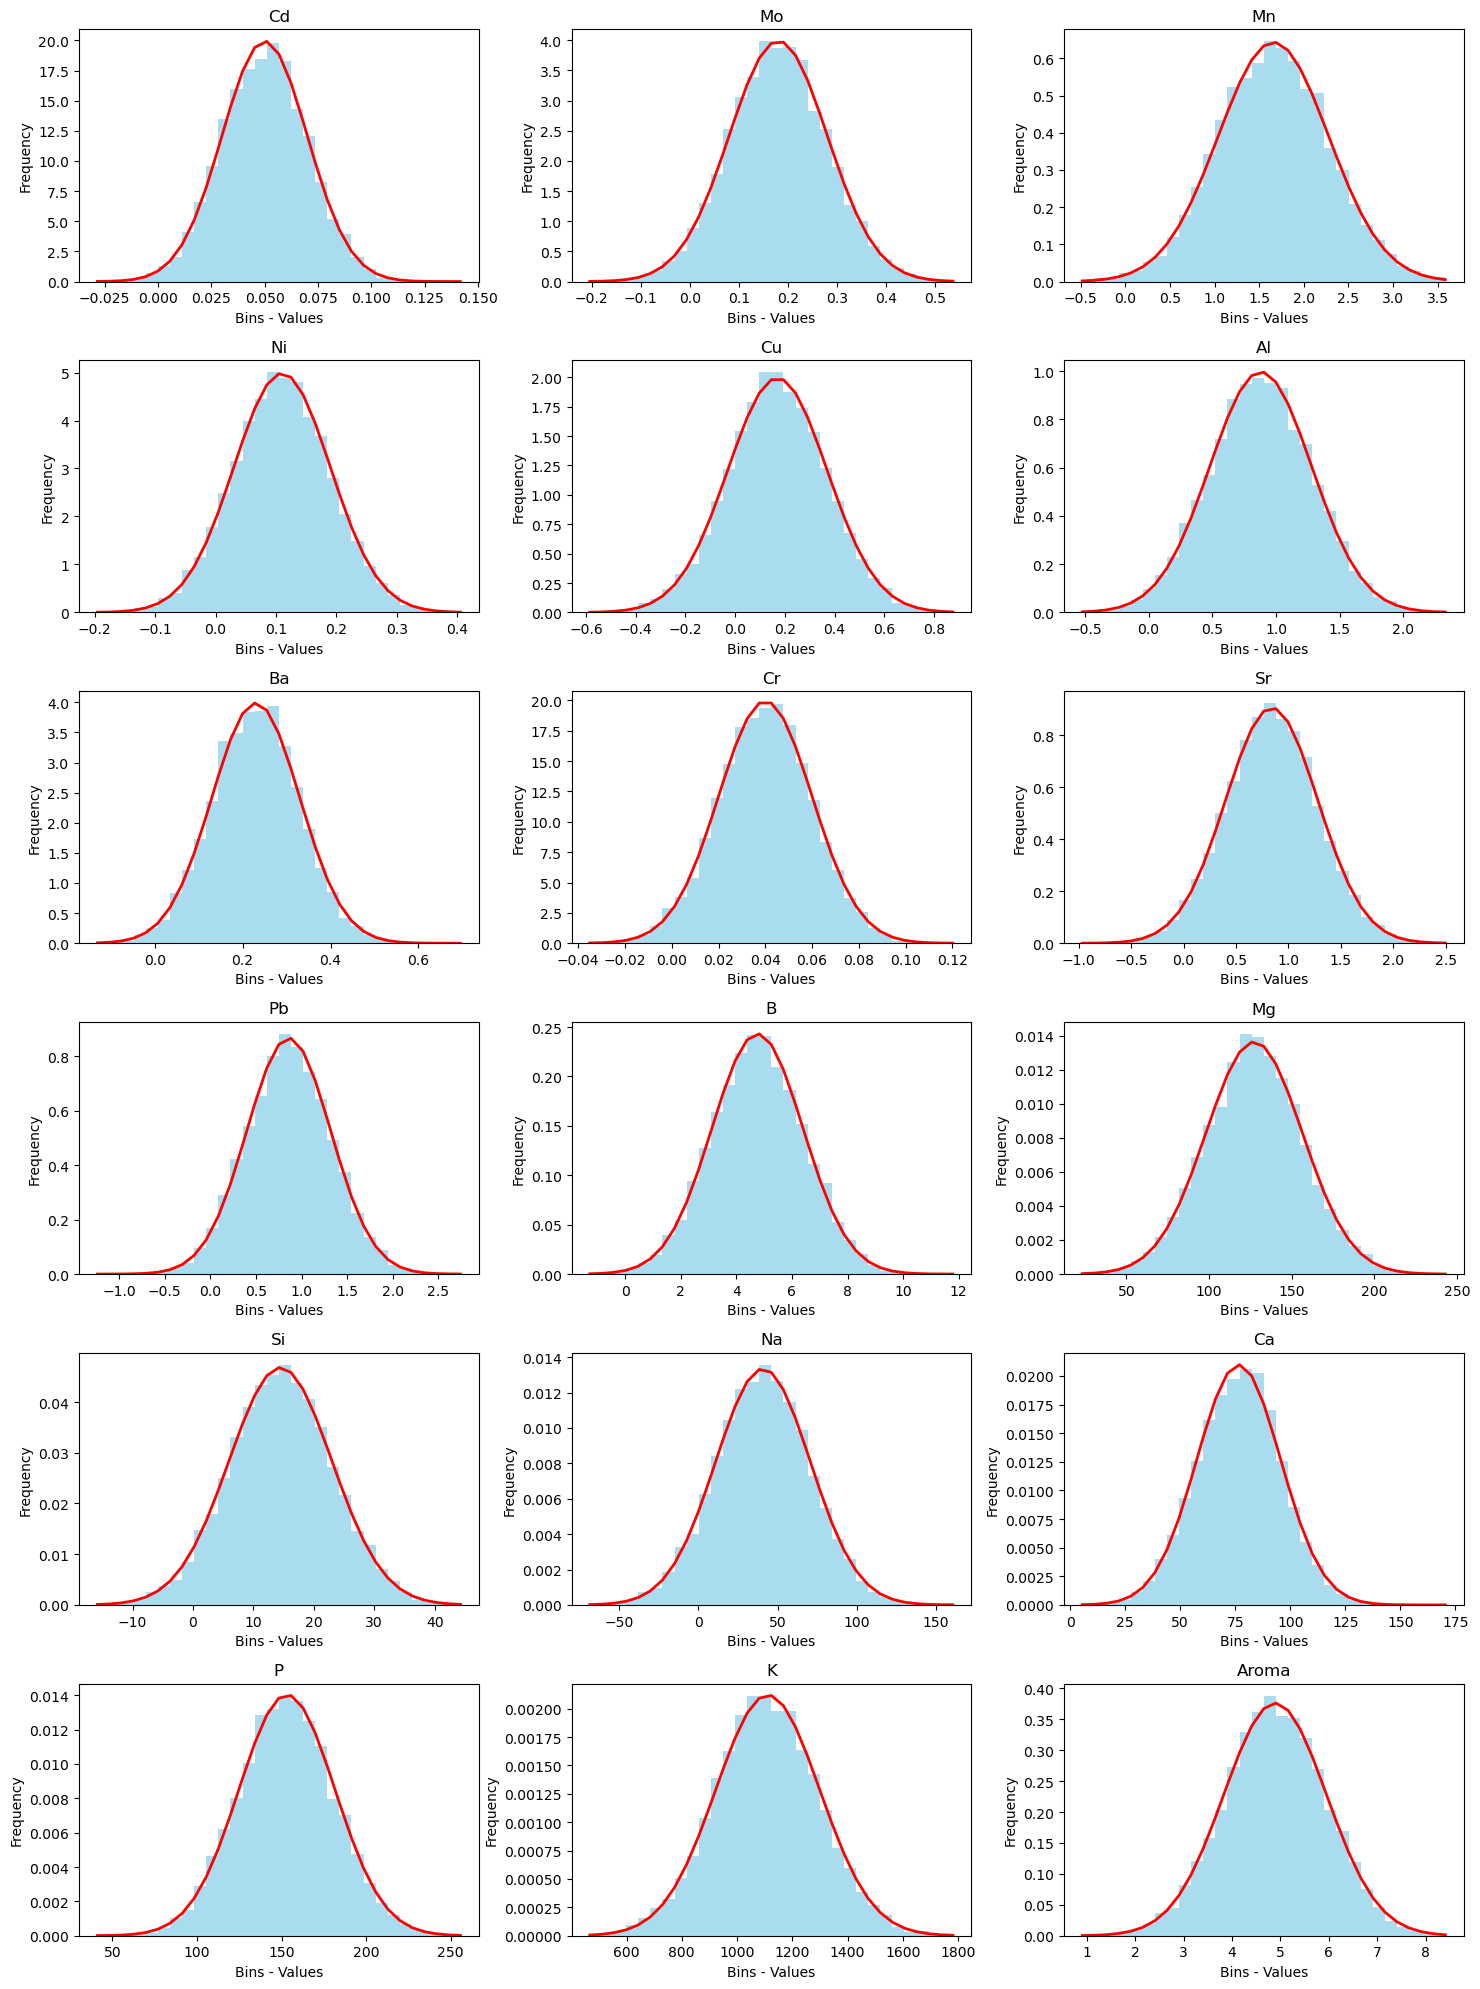

In [9]:
# Create subplots: 6 rows, 3 columns, figure size (15, 20)
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

# Loop through each subplot
for i in range(6):
    for j in range(3):
        
        count, bins, ignored = axes[i, j].hist(samples_array[i,j], 30, density=True, color='skyblue',alpha=0.7)
        axes[i, j].plot(bins, 1/(stds_array[i,j] * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - means_array[i,j])**2 / (2 * stds_array[i,j]**2) ),
            linewidth=2, color='r');
        
        # Set title and labels
        axes[i, j].set_title(metals_array[i,j])
        axes[i, j].set_xlabel('Bins - Values')
        axes[i, j].set_ylabel('Frequency')
        

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

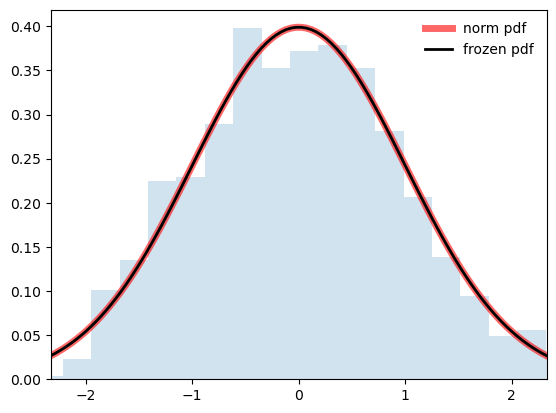

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()